### ESMA 3016
### Edgar Acuna
### Lab20: Inferencia para la media de una poblacion Normal (varianza desconocida) y muestra pequena

In [ ]:
from scipy.stats  import norm, t, ttest_1samp
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
%matplotlib inline

In [3]:
#Caso 2: Poblacion Normal y varianza (sigma^2) desconocida,muestra pequena
#uso de la distribucion t de Student
#Hallando el valor de la curva t con 10 grados de libertad en el punto x=3 
t.pdf(3,10)

0.011400549464542527

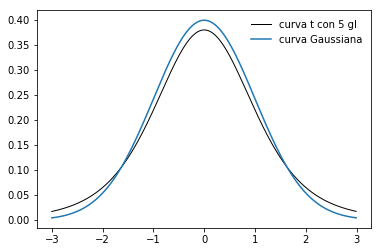

In [4]:
#Comparacion de la curva t con 5 gl y la curva normal estandar
x=np.arange(-3,3,.01)
fig,ax=plt.subplots(1, 1)
ax.plot(x, t.pdf(x,5), 'k-', lw=1, label='curva t con 5 gl')
ax.plot(x,norm.pdf(x), label= 'curva Gaussiana')
ax.legend(loc='best', frameon=False)

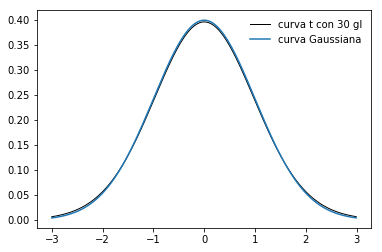

In [7]:
#comparando con una t con 30 grados de libertad
x=np.arange(-3,3,.01)
fig,ax=plt.subplots(1, 1)
ax.plot(x, t.pdf(x,30), 'k-', lw=1, label='curva t con 30 gl')
ax.plot(x,norm.pdf(x), label= 'curva Gaussiana')
ax.legend(loc='best', frameon=False)

In [8]:
#Area debajo de la curva t con 10 gl y a la izquierda de x=2
t.cdf(2,10)

0.96330598261462974

In [9]:
#Percentile del 95%  de una t con 10 gl
t.ppf(.95,10)

1.8124611228107335

In [10]:
#Generacion al azar de valores de la t con 10 grados de libertad
a=t.rvs(10,size=1000)

In [11]:
#media estimada de a t con 10 grados de libertad
np.mean(a)

-0.01211617614238864

#### El valor exacto es CERO

In [9]:
#deviacion estandar estimada de la t con 10 grados de libertad
np.std(a,ddof=1)
#el valor exacto debe ser sqrt(n/n-2)=1.118

1.0641904636086039

### Intervalo de confianza para la media

La media muestral xbarra es un estimador de la media pobacional $\mu$

Intervalo de confianza para $\mu$ del $100(1-\alpha)\%$, $\alpha$ es el nivel de significacion
$\bar{x}-t(\alpha/2,n-1)*\frac{s}{\sqrt{n}},\bar{x}+t(\alpha/2,n-1)*\frac{s}{\sqrt{n}}$

Ejemplo 1: Hallar el intervalo de confianza del 95% para el promedio de todos los graduandos
basado en la siguiente muestra de 14 graduandos. Asumir que la poblacion es normal 

In [12]:
gpa=[3.15,2.80,2.56,3.17,3.73,2.77,3.18,3.12,3.33,2.99,2.71,2.83,3.45,3.55]

In [15]:
# Esta es una funcion que hace el intervalo de confianza
def IC_media_t(data, confianza=0.95):
    a = 1.0*np.array(data)
    n = len(a)
    m, se = np.mean(a), np.std(a,ddof=1)/sqrt(n)
    h = se * t.ppf((1+confianza)/2,n-1)
    print "La media muestral es:",m, "El error estandar es",se
    print "El intervalo de confianza es:", m-h, m+h
    return 

In [16]:
IC_media_t(gpa, 0.95)   

La media muestral es: 3.09571428571 El error estandar es 0.0912773474643
El intervalo de confianza es: 2.89852156521 3.29290700622


### Ejemplo 7.5. Los tiempos de sobrevivencia (en años) de 12 personas que se han sometido a un transplante de corazón son los siguientes:

In [18]:
surv=[3.1,.9,2.8,4.3,.6,1.4,5.8,9.9,6.3,10.4,0,11.5]

In [19]:
#Hallar un intervalo de confianza del 99 por ciento para el promedio de vida
#de todas las personas que se han sometido a un transplante de corazón.
IC_media_t(surv,0.99)

La media muestral es: 4.75 El error estandar es 1.16797545636
El intervalo de confianza es: 1.12249422034 8.37750577966


In [20]:
#Tambien se puede usar el comando t.interval
sigma=np.std(surv,ddof=1)/sqrt(12)
t.interval(alpha=.99,df=11,loc=np.mean(surv),scale=sigma)

(1.1224942203449952, 8.377505779655003)

In [21]:
#Probar la hipotesis de que el tiempo de sobrevivencia promedio es mas de 4
ttest_1samp(surv, 4)   

Ttest_1sampResult(statistic=0.64213678114038952, pvalue=0.53393802013378555)

#### El comando ttest_1samp da el p-value para las prueba de dos lados, como nuestra prueba es de un solo lado
#### Hay que dividir el p-value obtenido por 2, osea p-value=.5339/2=.2669 Mayor que .05 Luego se rechaza la prueba

In [17]:
# Haciendo una funcion que halle p-value de la prueba estadistica de t
def ttest(data,mu_0,alternativa="no igual a"):
    #Esta funcion calcula el p-value de la prueba z
    a = 1.0*np.array(data)
    n = len(a)
    m, se = np.mean(a), np.std(a,ddof=1)/sqrt(n)
    test=(m-mu_0)/se
    if alternativa=="mayor que":
        p_value=1-t.cdf(test,n-1)
    elif alternativa=="menor que":
        p_value=t.cdf(test,n-1)
    else:
        p_value=2*(1-t.cdf(abs(test),n-1))
    print "El p-value es:", p_value    
    return

In [18]:
ttest(surv,4,alternativa="mayor que")

El p-value es: 0.266969010067


In [19]:
#La probabilidad acumulada de la Normal hasta x=2
norm.cdf(2)

0.97724986805182079

In [22]:
#La probabilidad acumudad de la t con 40 gl hasta x=2
t.cdf(2,40)

0.97383882839247538